<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Условия." data-toc-modified-id="Условия.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Условия.</a></span></li><li><span><a href="#Задание-1." data-toc-modified-id="Задание-1.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задание 1.</a></span></li><li><span><a href="#Задание-2." data-toc-modified-id="Задание-2.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Задание 2.</a></span></li><li><span><a href="#Задание-3." data-toc-modified-id="Задание-3.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Задание 3.</a></span></li><li><span><a href="#Задание-4." data-toc-modified-id="Задание-4.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Задание 4.</a></span></li><li><span><a href="#Задание-5." data-toc-modified-id="Задание-5.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Задание 5.</a></span></li></ul></div>

# Условия.

Зарплаты в San Francisco
https://www.kaggle.com/kaggle/sf-salaries?select=Salaries.csv 
1. Как со временем менялись зарплаты между разными группами (группировка по Department - fire, medicine, police)? (максимальная, медианная, средняя)
2. Как распределяются базовая оплата, сверхурочная работа и льготы между разными группами? Нужно построить диаграммы по распределению со временем для каждого департамента по базовым, сверхурочным и льготам
3. Как распределяется бюджет на разные группы (department) с течением времени?
4. Какое количество людей в каждом департаменте? 
5. Какое количество с разным уровнем дохода? (гистограмма с шагом в 5к) 
6. На базе линейной регрессии постройте прогноз по тому, какие будут закупке в следующий год по каждому департаменту
7. Комментарий преподавателя на тему 6 задания: 'Я имел ввиду, что нужно построить регрессию на базе имеющих данных (их может не быть) Те Если есть данные за 10ый и 11ый - то нужно продолжить и построить за 12ый'


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Загрузка датасета
data = pd.read_csv('Salaries.csv')
data.head()

C:\Users\Stas\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
data.drop(columns=['Notes','Id','EmployeeName','Agency','Status'],inplace=True)
data = data[data['JobTitle'] != 'Not provided']
data.reset_index(inplace = True, drop = True)
data['JobTitle'] = data['JobTitle'].str.lower()

In [5]:
def flag(df, title ):
    '''Функция разметки сотрудников по депортаментам'''
    
    res = []
    
    for row in df.iterrows():
        if 'police'  in row[1][title]:
            res.append('PD')
        elif 'sheriff'  in row[1][title]:
            res.append('PD')
        elif 'fire' in row[1][title]:
            res.append('FD')
        elif  'nurs'  in row[1][title]:
            res.append('HD')
        elif  'doctor'  in row[1][title]:
            res.append('HD')
        elif  'med'  in row[1][title]:
            res.append('HD')
        elif  'clinic'  in row[1][title]:
            res.append('HD')
        elif  'physician'  in row[1][title]:
            res.append('HD')
        else:
            res.append('Other dep')        
    return res

In [ ]:
#проверка функци на семпле датасета
data_sample = data.sample(10).copy()
data_sample['Flag'] = flag(data_sample, 'JobTitle')
data_sample 

In [6]:
#применение функции flag на весь датасет
data['flag'] = flag(data, 'JobTitle')

In [7]:
#оставляем только записи по нужным нам департаментам
data = data[data['flag'] != 'Other dep']

In [8]:
#корректируем формат данных
data['BasePay'] = data['BasePay'].astype('float64')
data['OvertimePay'] = data['OvertimePay'].astype('float64')
data['OtherPay'] = data['OtherPay'].astype('float64')
data['Benefits'] = data['Benefits'].astype('float64')

<ipython-input-8-fa2f692a9f8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BasePay'] = data['BasePay'].astype('float64')
<ipython-input-8-fa2f692a9f8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['OvertimePay'] = data['OvertimePay'].astype('float64')
<ipython-input-8-fa2f692a9f8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
flag                 object
dtype: object

# Задание 1.

<AxesSubplot:xlabel='Year'>

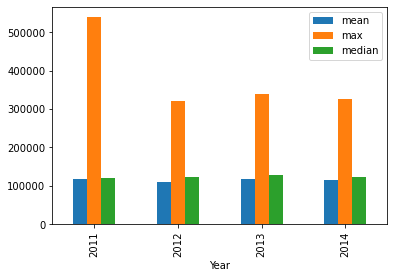

In [16]:
#Изменение зарплат в депортаменте полиции по годам
data[data['flag'] == 'PD'].groupby('Year')['TotalPay'].agg(['mean', 'max', "median"]).plot(kind='bar')

<AxesSubplot:xlabel='Year'>

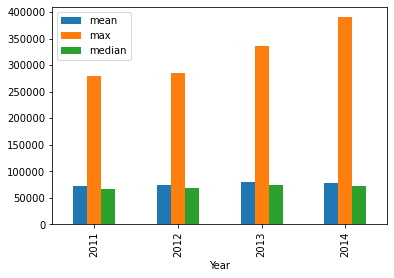

In [17]:
##Изменение зарплат в депортаменте здравоохранения по годам
data[data['flag'] == 'HD'].groupby('Year')['TotalPay'].agg(['mean', 'max', "median"]).plot(kind='bar')

<AxesSubplot:xlabel='Year'>

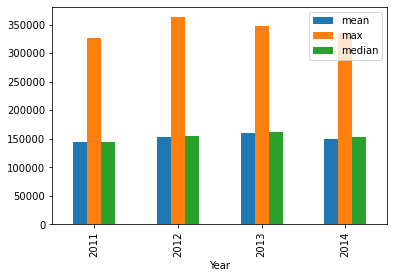

In [19]:
##Изменение зарплат в депортаменте пожарных по годам
data[data['flag'] == 'FD'].groupby('Year')['TotalPay'].agg(['mean', 'max', "median"]).plot(kind='bar')

# Задание 2.

In [20]:
#создаем датафреймы по каждому департаменту
data_pd = data[data['flag'] == 'PD']
data_fd = data[data['flag'] == 'FD']
data_hd = data[data['flag'] == 'HD']

<AxesSubplot:xlabel='Year'>

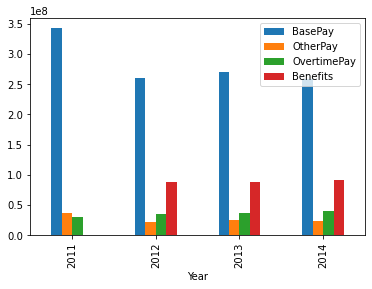

In [29]:
#распределение доходов по типам в полицейском департаменте
data_pd.groupby('Year')[['BasePay', 'OtherPay', 'OvertimePay', 'Benefits']].agg('sum').plot(kind = 'bar')

<AxesSubplot:xlabel='Year'>

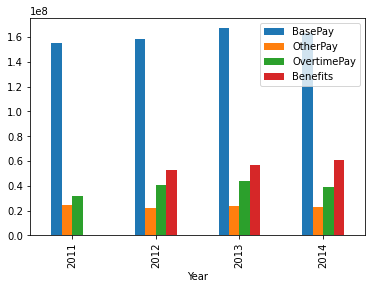

In [30]:
#распределение доходов по типам в пожарном департаменте
data_fd.groupby('Year')[['BasePay', 'OtherPay', 'OvertimePay', 'Benefits']].agg('sum').plot(kind = 'bar')

<AxesSubplot:xlabel='Year'>

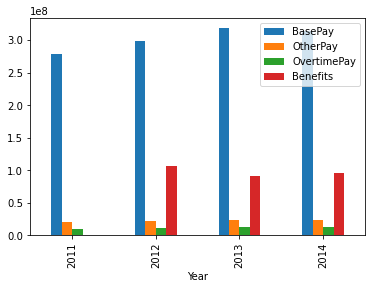

In [31]:
#распределение доходов по типам в мед. департаменте
data_hd.groupby('Year')[['BasePay', 'OtherPay', 'OvertimePay', 'Benefits']].agg('sum').plot(kind = 'bar')

# Задание 3.

<AxesSubplot:xlabel='Year'>

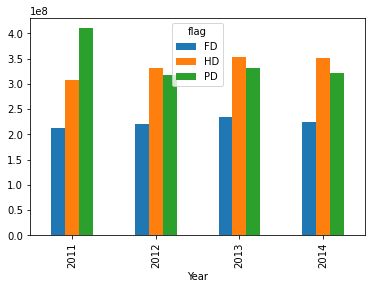

In [36]:
#расходы департаментов на оплату труда по годам
dep = data.pivot_table(index='Year', values = 'TotalPay', columns='flag', aggfunc='sum' )
dep.plot(kind='bar')

# Задание 4.

<AxesSubplot:xlabel='Year'>

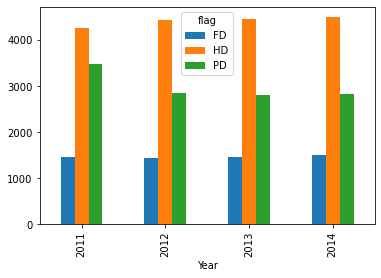

In [43]:
#Количество сотрудников по департаментам
number_of_humans = data.pivot_table(index='Year', values = 'JobTitle', columns='flag', aggfunc='size' )
number_of_humans.plot(kind = 'bar')

# Задание 5.

In [53]:
#Датафреймы по годам
data_11 = data[data['Year'] == 2011]
data_12 = data[data['Year'] == 2012]
data_13 = data[data['Year'] == 2013]
data_14 = data[data['Year'] == 2014]

(array([12.,  7., 16., ...,  0.,  0.,  1.]),
 array([5.80000000e+00, 1.13580696e+02, 2.21361392e+02, ...,
        5.38693719e+05, 5.38801499e+05, 5.38909280e+05]),
 <BarContainer object of 5000 artists>)

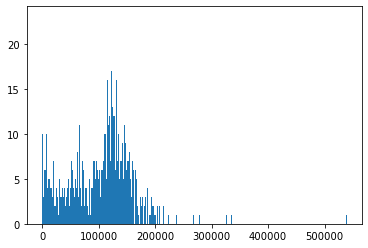

In [59]:
#гистограмма доходов за 11 год
plt.hist(data_11['TotalPay'], bins = 5000)

(array([22., 27.,  6., ...,  0.,  0.,  1.]),
 array([0.00000000e+00, 7.25689320e+01, 1.45137864e+02, ...,
        3.62699522e+05, 3.62772091e+05, 3.62844660e+05]),
 <BarContainer object of 5000 artists>)

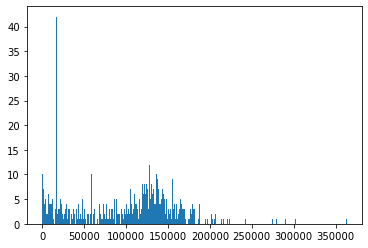

In [55]:
#гистограмма доходов за 12 год
plt.hist(data_12['TotalPay'], bins = 5000)

(array([38., 10.,  7., ...,  0.,  0.,  1.]),
 array([0.00000000e+00, 6.94204640e+01, 1.38840928e+02, ...,
        3.46963479e+05, 3.47032900e+05, 3.47102320e+05]),
 <BarContainer object of 5000 artists>)

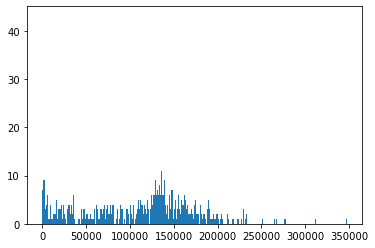

In [56]:
#гистограмма доходов за 13 год
plt.hist(data_13['TotalPay'], bins = 5000)

(array([22., 12., 13., ...,  0.,  0.,  1.]),
 array([0.00000000e+00, 7.80223960e+01, 1.56044792e+02, ...,
        3.89955935e+05, 3.90033958e+05, 3.90111980e+05]),
 <BarContainer object of 5000 artists>)

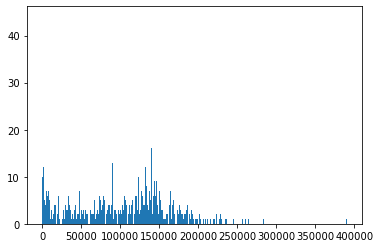

In [61]:
#гистограмма доходов за 14 год
plt.hist(data_14['TotalPay'], bins = 5000)